In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 4.7.1 The Stock Market Data

In [2]:
Smarket = pd.read_csv('../data/Smarket.csv')
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
Smarket.shape

(1250, 9)

In [4]:
Smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [5]:
# Pairwise correlations among the predictors in Smarket
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


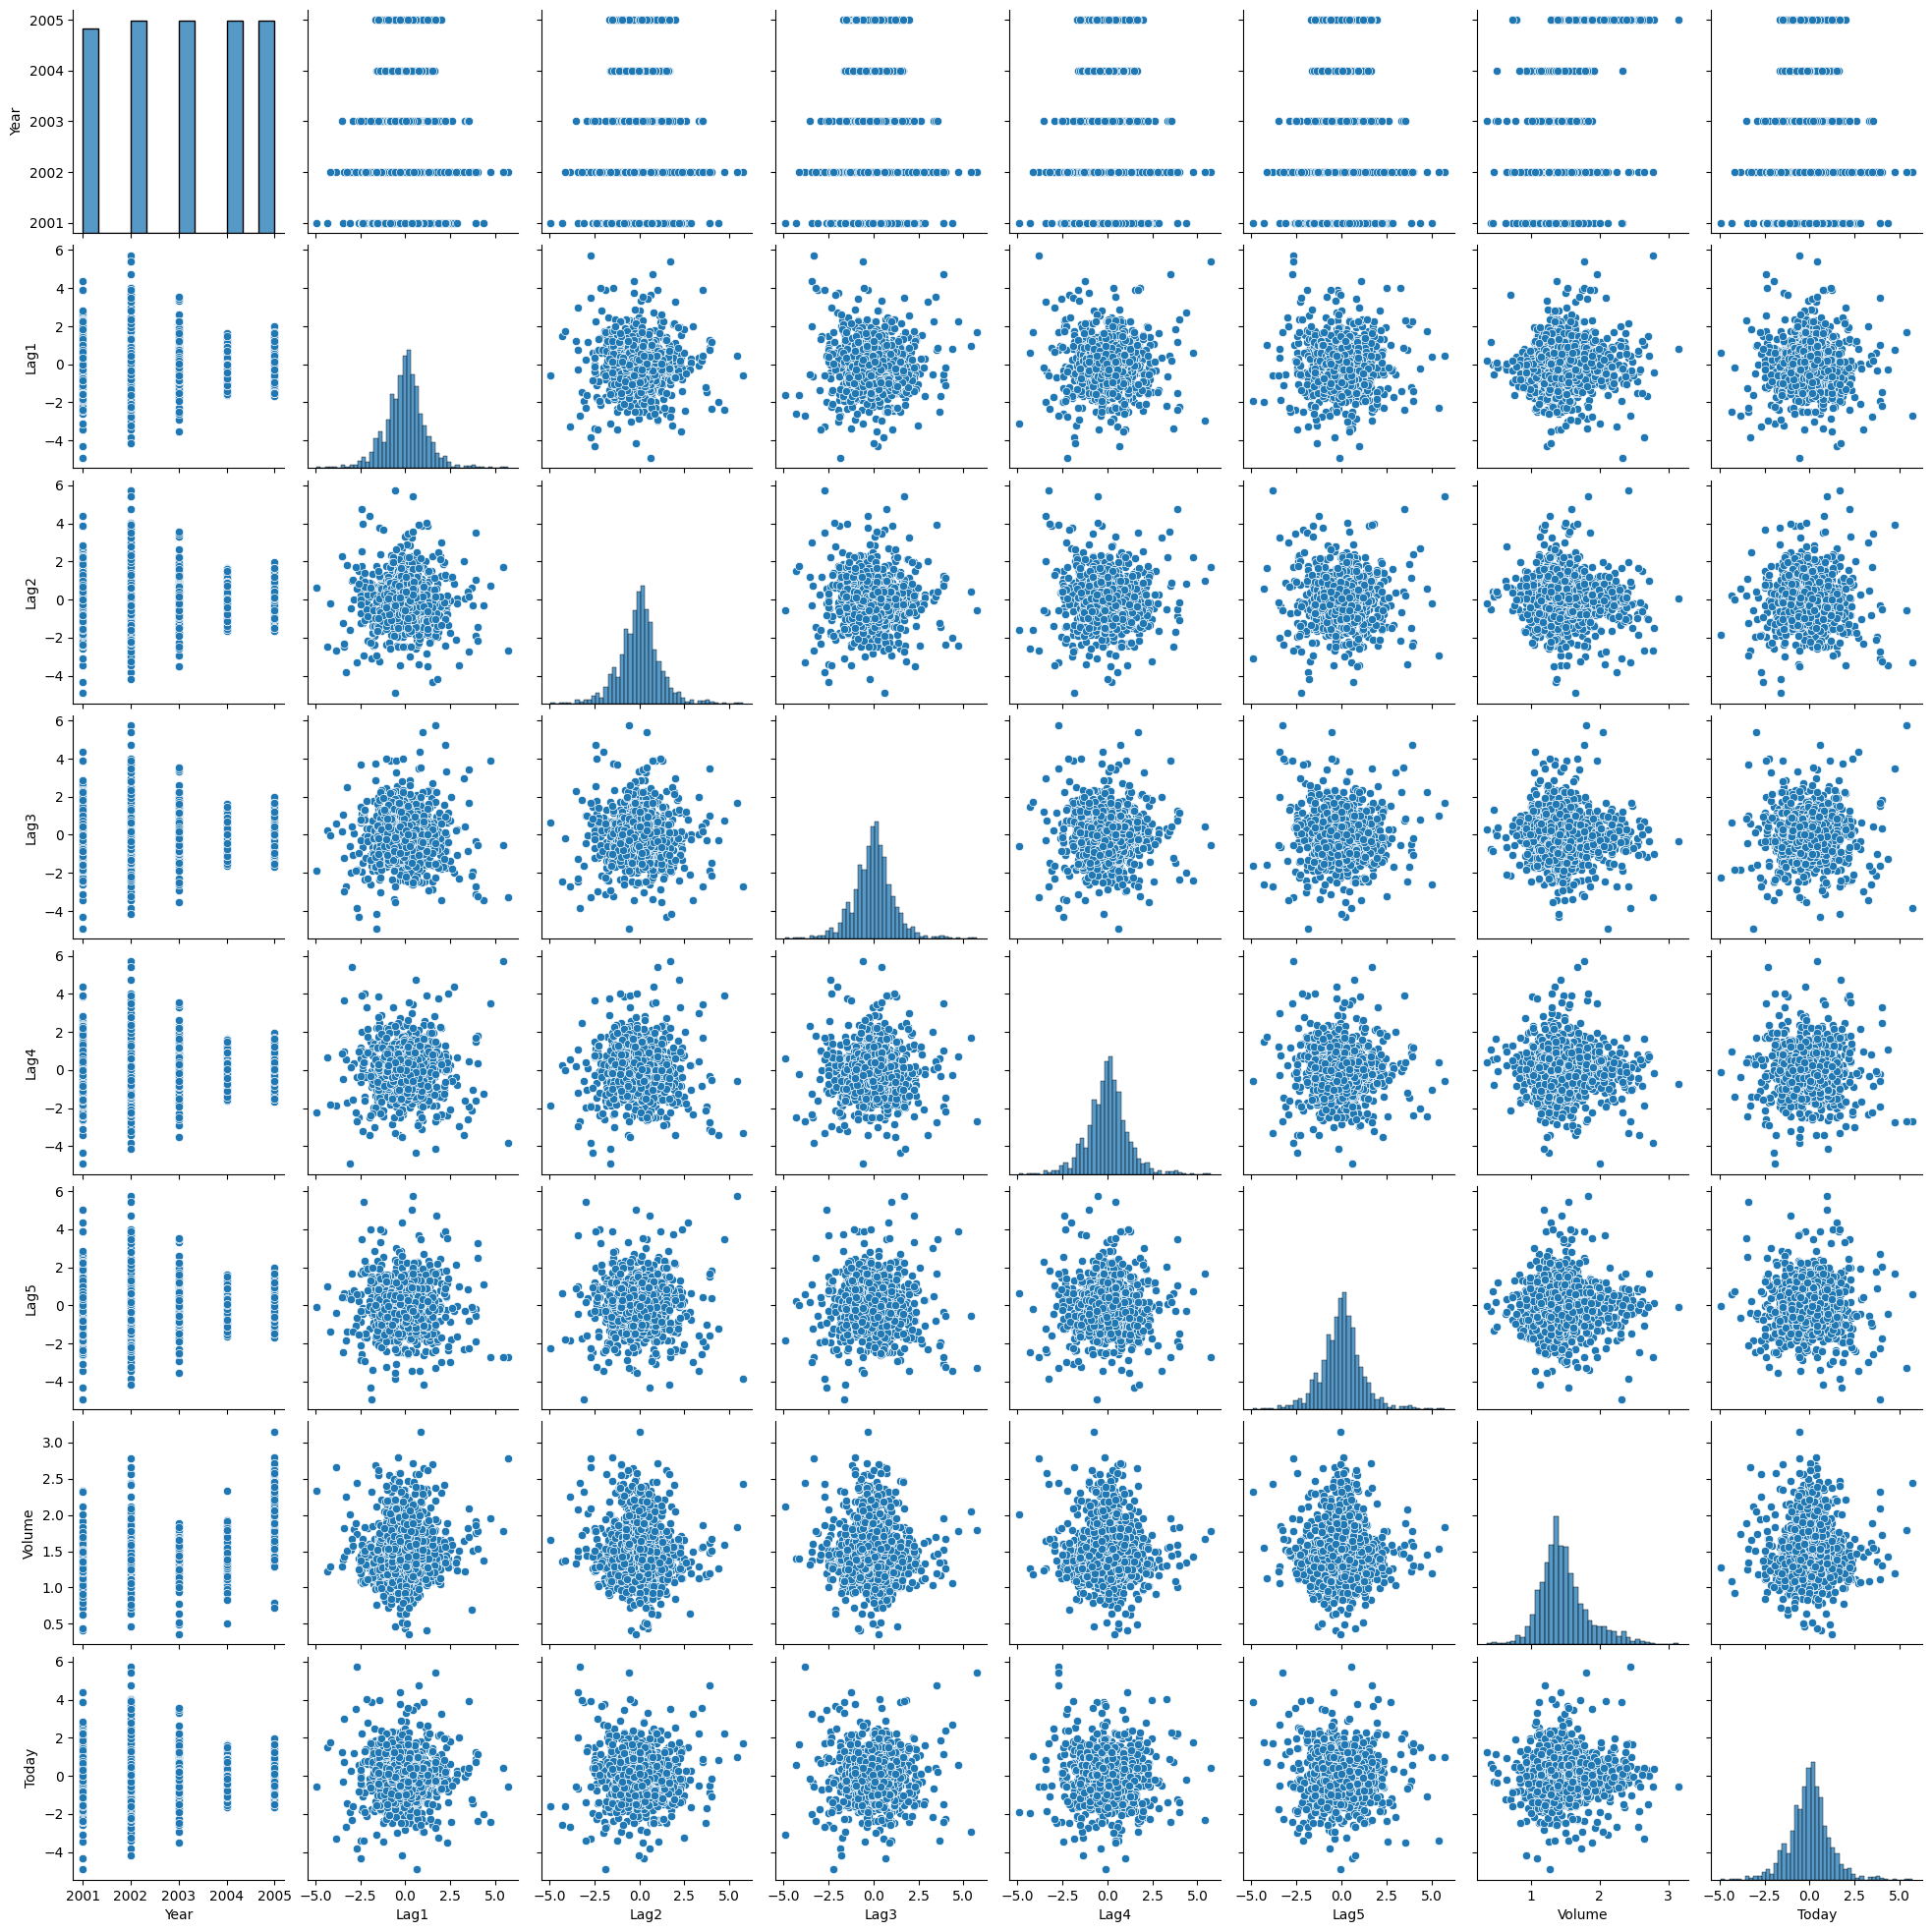

In [6]:
sns.pairplot(Smarket)

Text(0, 0.5, 'Market Volume')

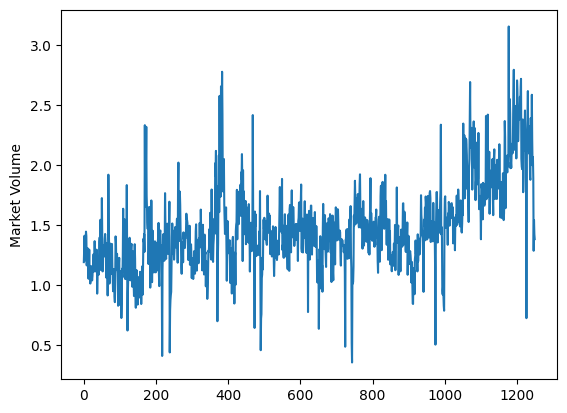

In [7]:
plt.plot(Smarket.Volume)
plt.ylabel('Market Volume')

### 4.7.2 Logistic Regression

In [8]:
X_sm = Smarket.loc[:, 'Lag1': 'Volume']
Y_sm = pd.get_dummies(Smarket['Direction'])['Up']

logit_model = sm.Logit(Y_sm, sm.add_constant(X_sm)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 2.197001
         Iterations 4


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                     inf
Time:                        00:03:23   Log-Likelihood:                -2746.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

The smallest p-value here is associated with `Lag1`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between `Lag1` and `Direction`.

In [9]:
logit_model.predict()

array([0.50708413, 0.48146788, 0.48113883, ..., 0.5392683 , 0.52611829,
       0.51791656])

In [10]:
# using Sklearn
from sklearn.linear_model import LogisticRegression

X_sk = Smarket.loc[:, 'Lag1':'Volume']
Y_sk = Smarket.Direction

logit_model_sk = LogisticRegression(fit_intercept=True)
logit_model_sk.fit(X_sk, Y_sk)
logit_model_sk.intercept_, logit_model_sk.coef_

(array([-0.12108463]),
 array([[-0.07284345, -0.04223481,  0.0110163 ,  0.00928427,  0.01026372,
          0.13211221]]))

In [11]:
# Displaying prediction results of sklearn logistic reg. model
pd.DataFrame({'prob_down': logit_model_sk.predict_proba(X_sk)[:, 0], 
              'prob_up': logit_model_sk.predict_proba(X_sk)[:, 1],
              'pred_class': logit_model_sk.predict(X_sk)})

,prob_down,prob_up,pred_class
0,0.492657,0.507343,Up
1,0.518256,0.481744,Down
2,0.518702,0.481298,Down
3,0.484651,0.515349,Up
4,0.489009,0.510991,Up
...,...,...,...
1245,0.480406,0.519594,Up
1246,0.493903,0.506097,Up
1247,0.460850,0.539150,Up
1248,0.473857,0.526143,Up


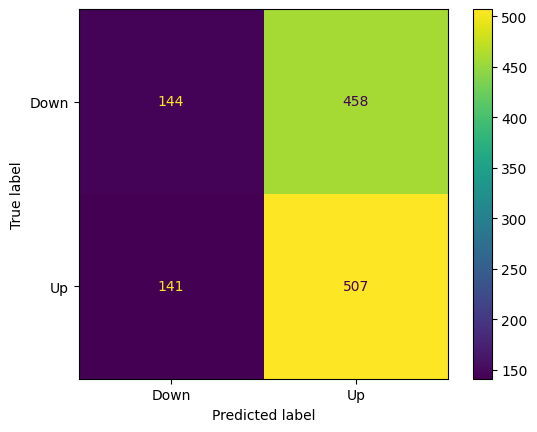

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix(Y_sk, logit_model_sk.predict(X_sk)), display_labels=['Down', 'Up'])
disp.plot()

In [13]:
acc_score = accuracy_score(Y_sk, logit_model_sk.predict(X_sk))
print(f'Accuracy: {acc_score}')
print(f'Training Error: {1-acc_score}')

Accuracy: 0.5208
Training Error: 0.47919999999999996


In [14]:
# train-test set split
train_set = Smarket.loc[Smarket.Year < 2005]
test_set = Smarket.loc[Smarket.Year >= 2005]

X_train = train_set.loc[:, 'Lag1':'Volume']
y_train = train_set.Direction

X_test = test_set.loc[:, 'Lag1':'Volume']
y_test = test_set.Direction

In [15]:
# fit the logistic reg. model with training set
logit_model_sk2 = LogisticRegression(fit_intercept=True)
logit_model_sk2.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Displaying test set prediction results
pd.DataFrame({'prob_down': logit_model_sk2.predict_proba(X_test)[:, 0], 
              'prob_up': logit_model_sk2.predict_proba(X_test)[:, 1],
              'pred_class': logit_model_sk2.predict(X_test)})

,prob_down,prob_up,pred_class
0,0.472684,0.527316,Up
1,0.484116,0.515884,Up
2,0.476859,0.523141,Up
3,0.485648,0.514352,Up
4,0.501405,0.498595,Down
...,...,...,...
247,0.515541,0.484459,Down
248,0.494062,0.505938,Up
249,0.483072,0.516928,Up
250,0.483822,0.516178,Up


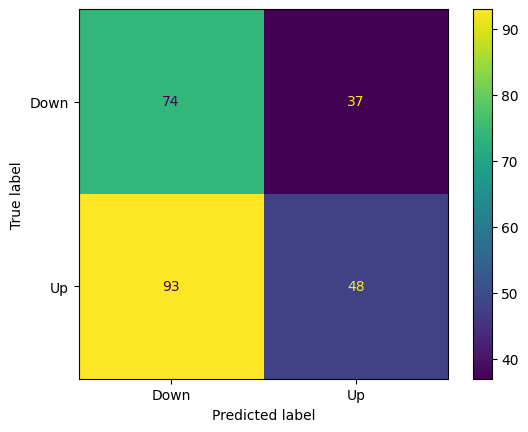

In [17]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, logit_model_sk2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [18]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, logit_model_sk2.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.48412698412698413
Test Error: 0.5158730158730158


In [19]:
# refit with only Lag1 and Lag2
train_set = Smarket.loc[Smarket.Year < 2005]
test_set = Smarket.loc[Smarket.Year >= 2005]

X_train = train_set.loc[:, ['Lag1', 'Lag2']]
y_train = train_set.Direction

X_test = test_set.loc[:, ['Lag1', 'Lag2']]
y_test = test_set.Direction

# fit the logistic reg. model with training set
logit_model_sk3 = LogisticRegression(fit_intercept=True)
logit_model_sk3.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Displaying test set prediction results
pd.DataFrame({'prob_down': logit_model_sk3.predict_proba(X_test)[:, 0], 
              'prob_up': logit_model_sk3.predict_proba(X_test)[:, 1],
              'pred_class': logit_model_sk3.predict(X_test)})

,prob_down,prob_up,pred_class
0,0.490178,0.509822,Up
1,0.479215,0.520785,Up
2,0.466806,0.533194,Up
3,0.473984,0.526016,Up
4,0.492782,0.507218,Up
...,...,...,...
247,0.500591,0.499409,Down
248,0.497225,0.502775,Up
249,0.479198,0.520802,Up
250,0.483153,0.516847,Up


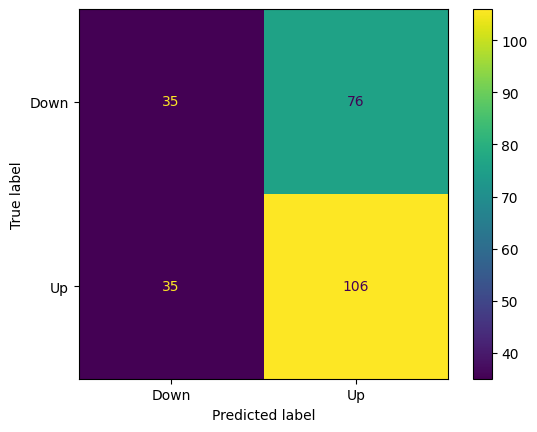

In [21]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, logit_model_sk3.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [22]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, logit_model_sk3.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


In [23]:
predict_df = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})
# prediction results
logit_model_sk3.predict_proba(predict_df)[:, 1]

array([0.47922465, 0.49614354])

### 4.7.3 Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train_set.loc[:, ['Lag1', 'Lag2']]
y_train = train_set.Direction

X_test = test_set.loc[:, ['Lag1', 'Lag2']]
y_test = test_set.Direction

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
# group priors
lda.priors_

array([0.49198397, 0.50801603])

$$\hat{\pi}_1 = 0.49198397$$
$$\hat{\pi}_2 = 0.50801603$$
in other words, 49.2% of the training observations correspond to days during which the market went down.

In [26]:
# group means
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [27]:
# coefficients of linear discriminants
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

The coefficients of linear discriminants output provides the linear combination of `Lag1` and `Lag2` that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of $X=x$ in $\delta_k(x) = X^T\sum^{-1}\mu_k - \frac{1}{2}\mu_k^T\sum^{-1}\mu_k + \log \pi_k$. If $−0.642 \times \text{Lag1} − 0.514 \times \text{Lag2}$ is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline 

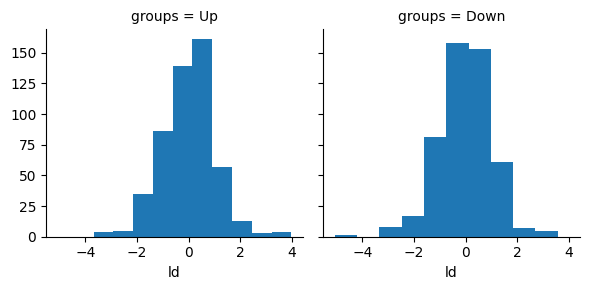

In [28]:
ld = lda.scalings_[0] * X_train.iloc[:,0] - lda.scalings_[1] * X_train.iloc[:, 1]

ld_df = pd.DataFrame({'groups': y_train, 'ld': ld})
g = sns.FacetGrid(ld_df, col='groups')
g.map(plt.hist, 'ld');

In [29]:
# Displaying test set prediction results
pd.DataFrame({'prob_down': lda.predict_proba(X_test)[:, 0], 
              'prob_up': lda.predict_proba(X_test)[:, 1],
              'pred_class': lda.predict(X_test)})

,prob_down,prob_up,pred_class
0,0.490179,0.509821,Up
1,0.479218,0.520782,Up
2,0.466818,0.533182,Up
3,0.474001,0.525999,Up
4,0.492788,0.507212,Up
...,...,...,...
247,0.500589,0.499411,Down
248,0.497221,0.502779,Up
249,0.479199,0.520801,Up
250,0.483167,0.516833,Up


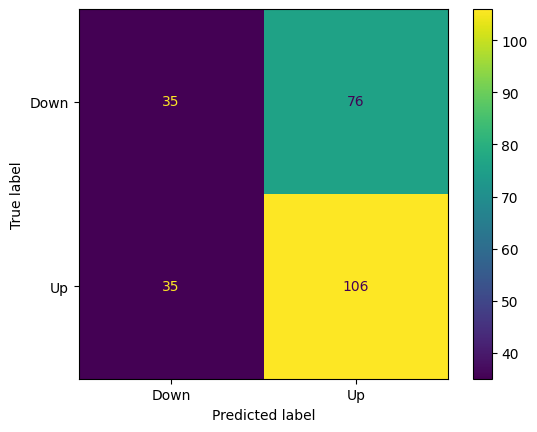

In [30]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, lda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [31]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


### 4.7.4 Quadratic Discriminant Analysis

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train = train_set.loc[:, ['Lag1', 'Lag2']]
y_train = train_set.Direction

X_test = test_set.loc[:, ['Lag1', 'Lag2']]
y_test = test_set.Direction

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [33]:
# group priors
qda.priors_

array([0.49198397, 0.50801603])

In [34]:
# group means
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [35]:
# coefficients of linear discriminants
qda.scalings_

[array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]

In [36]:
# Displaying test set prediction results
pd.DataFrame({'prob_down': qda.predict_proba(X_test)[:, 0], 
              'prob_up': qda.predict_proba(X_test)[:, 1],
              'pred_class': qda.predict(X_test)})

,prob_down,prob_up,pred_class
0,0.487324,0.512676,Up
1,0.475901,0.524099,Up
2,0.463691,0.536309,Up
3,0.473925,0.526075,Up
4,0.490343,0.509657,Up
...,...,...,...
247,0.497670,0.502330,Up
248,0.494787,0.505213,Up
249,0.475864,0.524136,Up
250,0.482695,0.517305,Up


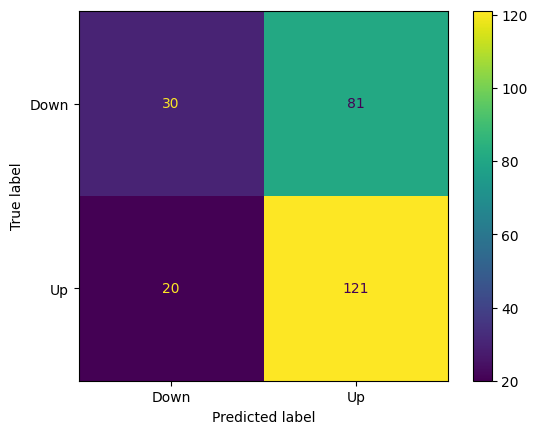

In [37]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, qda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [38]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5992063492063492
Test Error: 0.4007936507936508


### 4.7.5 Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

X_train = train_set.loc[:, ['Lag1', 'Lag2']]
y_train = train_set.Direction

X_test = test_set.loc[:, ['Lag1', 'Lag2']]
y_test = test_set.Direction

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [40]:
# class priors
naive_bayes.class_prior_

array([0.49198397, 0.50801603])

In [41]:
# mean of each feature per class.
naive_bayes.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [42]:
# standard deviation of each feature per class
np.power(naive_bayes.var_, 0.5)

array([[1.22619505, 1.23792871],
       [1.23045262, 1.21956089]])

In [43]:
# Displaying test set prediction results
pd.DataFrame({'prob_down': naive_bayes.predict_proba(X_test)[:, 0], 
              'prob_up': naive_bayes.predict_proba(X_test)[:, 1],
              'pred_class': naive_bayes.predict(X_test)})

,prob_down,prob_up,pred_class
0,0.487329,0.512671,Up
1,0.476236,0.523764,Up
2,0.465295,0.534705,Up
3,0.474845,0.525155,Up
4,0.490206,0.509794,Up
...,...,...,...
247,0.497612,0.502388,Up
248,0.494660,0.505340,Up
249,0.476011,0.523989,Up
250,0.482798,0.517202,Up


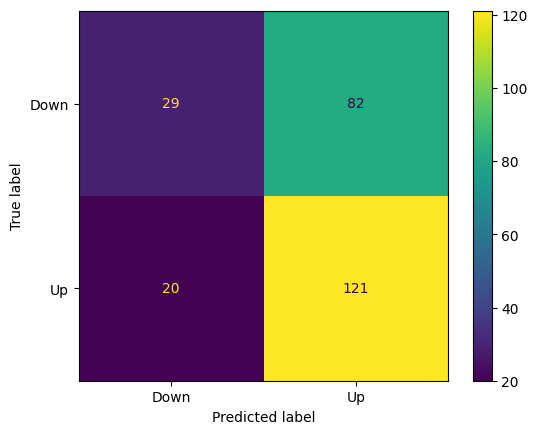

In [44]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, naive_bayes.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [45]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, naive_bayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5952380952380952
Test Error: 0.40476190476190477


### 4.7.6 K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

X_train = train_set.loc[:, ['Lag1', 'Lag2']]
y_train = train_set.Direction

X_test = test_set.loc[:, ['Lag1', 'Lag2']]
y_test = test_set.Direction

# KNN algorithm with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

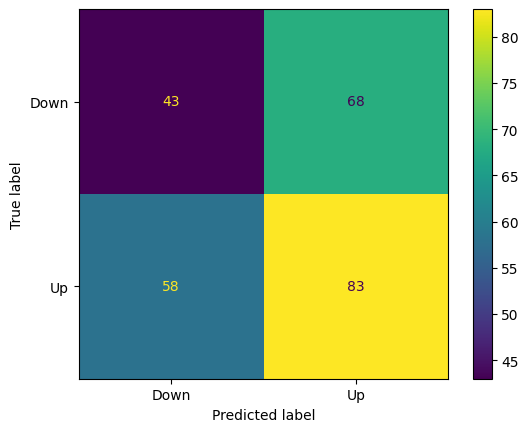

In [47]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [48]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, knn.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5
Test Error: 0.5


In [49]:
# KNN algorithm with K=3
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

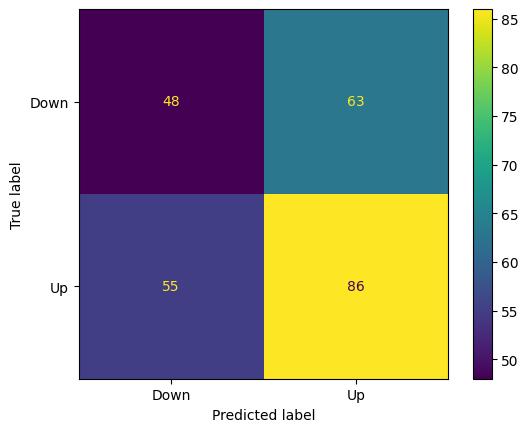

In [50]:
# confusion matrix of knn with k=3
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [51]:
# Accuracy Score and Test error of knn with k=3
acc_score = accuracy_score(y_test, knn2.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5317460317460317
Test Error: 0.46825396825396826


------

In [52]:
# Application of KNN on Caravan data set
caravan = pd.read_csv('../data/caravan.csv')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [53]:
caravan.shape

(5822, 86)

In [54]:
caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale.

In [55]:
from scipy.stats import zscore

# apply normal standardization to input features
X_standard = caravan.iloc[:, 0:85].apply(zscore)
y = caravan.Purchase

X_train = X_standard.iloc[1001:, :]
y_train = y.loc[1001:]

X_test = X_standard.loc[:1000, :]
y_test = y.loc[:1000]

In [56]:
# train knn on scaled dataset, K=1

knn_caravan = KNeighborsClassifier(n_neighbors=1)
knn_caravan.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

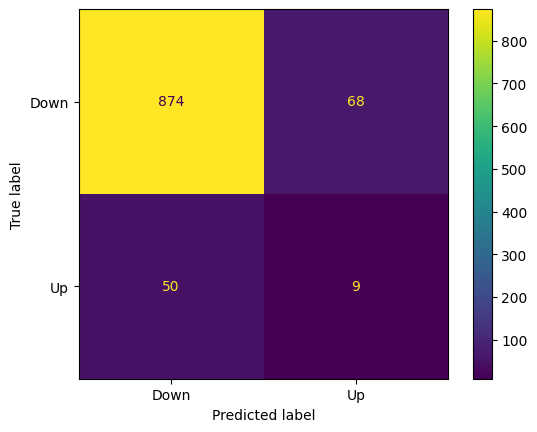

In [57]:
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_caravan.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [58]:
# Accuracy Score and Test error
acc_score = accuracy_score(y_test, knn_caravan.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.8821178821178821
Test Error: 0.11788211788211789


The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6 % by always predicting No regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance to a given individual. For instance, perhaps a salesperson must visit each potential customer. If the company tries to sell insurance to a random selection of customers, then the success rate will be only 6%, which may be far too low given the costs involved. Instead, the company would like to try to sell insurance only to customers who are likely to buy it. So the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance is of interest.

It turns out that KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance. Among 77 such customers, 9, or 11.7 %, actually do purchase insurance. This is double the rate that one would obtain from random guessing.

In [59]:
from sklearn.metrics import precision_score
print('Precision score: ' + str(precision_score(y_test, knn_caravan.predict(X_test) , pos_label='Yes')))

Precision score: 0.11688311688311688


In [60]:
knn_caravan2 = KNeighborsClassifier(n_neighbors=3)
knn_caravan2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

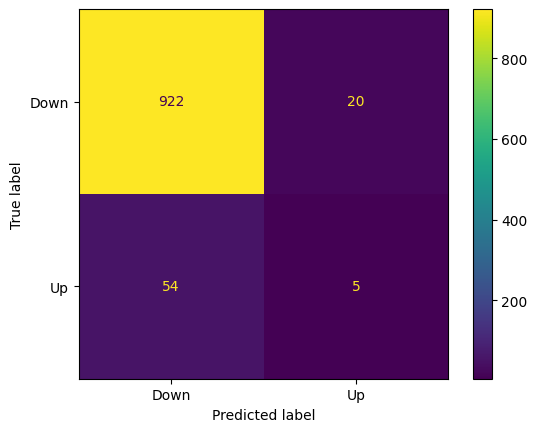

In [61]:
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_caravan2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [62]:
print('Precision score: ' + str(precision_score(y_test, knn_caravan2.predict(X_test) , pos_label='Yes')))

Precision score: 0.2


In [63]:
knn_caravan3 = KNeighborsClassifier(n_neighbors=5)
knn_caravan3.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
print('Precision score: ' + str(precision_score(y_test, knn_caravan3.predict(X_test) , pos_label='Yes')))

Precision score: 0.26666666666666666


As a comparison, we can also fit a logistic regression model to the data. If we use 0.5 as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these! However, we are not required to use a cut-off of 0.5. If we instead predict a purchase any time the predicted probability of purchase exceeds 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about 33% of these people. This is over five times better than random guessing!

In [65]:
# Fit a logistic regression model on caravan data
caravan_logit = LogisticRegression(fit_intercept=True)
caravan_logit.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

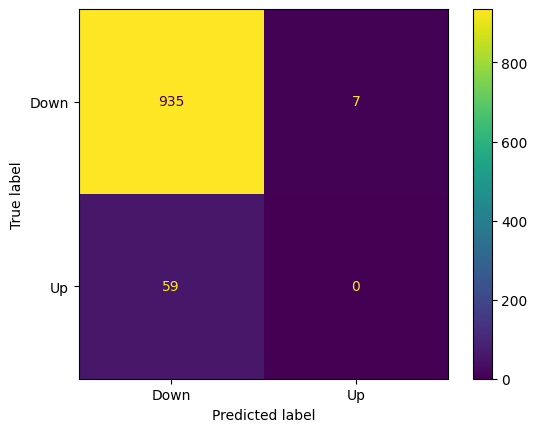

In [66]:
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, caravan_logit.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [67]:
print('Precision score: ' + str(precision_score(y_test, caravan_logit.predict(X_test) , pos_label='Yes')))

Precision score: 0.0


In [68]:
# set the threshold to 0.25 for logistic regression
results = caravan_logit.predict_proba(X_test)[:, 1] > 0.25
results_df = pd.Series(results).map({False: 'No', True: 'Yes'})

conf_m = pd.DataFrame(confusion_matrix(y_test, results_df))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,918,24
1,48,11


In [69]:
print('Precision score: ' + str(precision_score(y_test, results_df , pos_label='Yes')))

Precision score: 0.3142857142857143


### 4.7.7 Poisson Regression

In [70]:
bikeshare = pd.read_csv('../data/bikeshare.csv', index_col=0)
bikeshare.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [71]:
bikeshare.columns

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'bikers'],
      dtype='object')

In [72]:
# Fittin a least squares linear regression model to the data

bikeshr_lr = smf.ols(formula='bikers ~ mnth + hr + workingday + temp + weathersit', data=bikeshare).fit()
bikeshr_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:03:28   Log-Likelihood:                -52635.
No. Observations:                8645   AIC:                         1.053e+05
Df Residuals:                    8627   BIC:                         1.054e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -101.1052      7.269    -13.910      0.000    -115.353     -86.857
mnth[T.Aug]                     -33.1123      6.410     -5.166      0.000     -45.677     -20.547
mnth[T.Dec]                      34.7242      5.908      5.878      0.000      23.144      46.305
mnth[T.Feb]                       5.3621      6.279      0.854      0.393      -6.946      17.670
mnth[T.Jan]                      15.8861      6.731      2.360      0.018       2.691      29.081
mnth[T.July]                    -52.1488      6.769     -7.704      0.000     -65.417     -38.881
mnth[T.June]                    -16.8499      6.343     -2.656      0.008     -29.284      -4.416
mnth[T.March]                     4.4564      5.906      0.755      0.451      -7.121      16.034
mnth[T.May]                      10.3534      5.757      1.798      0.072      -0.932      21.639
mnth[T.Nov]                      32.8573      5.705      5.759      0.000      21.674      44.041
mnth[T.Oct]                      34.6532      5.591      6.198      0.000      23.694      45.613
mnth[T.Sept]                     -3.0572      5.930     -0.516      0.606     -14.681       8.567
weathersit[T.cloudy/misty]      -10.5972      2.729     -3.884      0.000     -15.946      -5.249
weathersit[T.heavy rain/snow]   -62.2356    106.855     -0.582      0.560    -271.698     147.227
weathersit[T.light rain/snow]   -58.2213      4.133    -14.088      0.000     -66.322     -50.120
hr                                6.6441      0.174     38.286      0.000       6.304       6.984
workingday                       -1.1738      2.489     -0.472      0.637      -6.053       3.705
temp                            356.0133     13.007     27.370      0.000     330.516     381.511
==============================================================================
Omnibus:                     1288.401   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2017.317
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       4.113   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Fitting a Poisson Regression model to the Bikeshare data

X = bikeshare.loc[:, ['mnth', 'hr', 'workingday', 'temp', 'weathersit']]
X = pd.get_dummies(X, columns=['mnth', 'weathersit', 'hr'], drop_first=True)
y = bikeshare.bikers

bikeshr_poisson = sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson()).fit()
bikeshr_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Sun, 26 Mar 2023   Deviance:                   2.2804e+05
Time:                        00:03:28   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.3854      0.010    333.686      0.000       3.365       3.405
workingday                     0.0147      0.002      7.502      0.000       0.011       0.018
temp                           0.7853      0.011     68.434      0.000       0.763       0.808
mnth_Aug                       0.1296      0.005     26.303      0.000       0.120       0.139
mnth_Dec                      -0.0048      0.005     -0.951      0.342      -0.015       0.005
mnth_Feb                      -0.4656      0.006    -76.909      0.000      -0.478      -0.454
mnth_Jan                      -0.6917      0.007    -98.996      0.000      -0.705      -0.678
mnth_July                      0.0821      0.005     15.545      0.000       0.072       0.092
mnth_June                      0.2017      0.005     41.673      0.000       0.192       0.211
mnth_March                    -0.3153      0.005    -58.225      0.000      -0.326      -0.305
mnth_May                       0.2189      0.004     49.792      0.000       0.210       0.228
mnth_Nov                       0.1287      0.005     27.880      0.000       0.120       0.138
mnth_Oct                       0.2460      0.004     56.949      0.000       0.238       0.255
mnth_Sept                      0.2120      0.005     46.873      0.000       0.203       0.221
weathersit_cloudy/misty       -0.0752      0.002    -34.528      0.000      -0.080      -0.071
weathersit_heavy rain/snow    -0.9263      0.167     -5.554      0.000      -1.253      -0.599
weathersit_light rain/snow    -0.5758      0.004   -141.905      0.000      -0.584      -0.568
hr_1                          -0.4716      0.013    -36.278      0.000      -0.497      -0.446
hr_2                          -0.8088      0.015    -55.220      0.000      -0.837      -0.780
hr_3                          -1.4439      0.019    -76.631      0.000      -1.481      -1.407
hr_4                          -2.0761      0.025    -83.728      0.000      -2.125      -2.027
hr_5                          -1.0603      0.016    -65.957      0.000      -1.092      -1.029
hr_6                           0.3245      0.011     30.585      0.000       0.304       0.345
hr_7                           1.3296      0.009    146.822      0.000       1.312       1.347
hr_8                           1.8313      0.009    211.630      0.000       1.814       1.848
hr_9                           1.3362      0.009    148.191      0.000       1.318       1.354
hr_10                          1.0912      0.009    117.831      0.000       1.073       1.109
hr_11                          1.2485      0.009    137.304      0.000       1.231       1.266
hr_12                          1.4340      0.009    160.486      0.000       1.417       1.452
hr_13                          1.4280      

In [74]:
def get_associated_coef(param_name, coeff_list):
    d = {}
    for key in coeff_list.keys():
        if param_name in key:
            d[key] = coeff_list[key]
    return d

Text(0.5, 1.0, 'Coefficient values of mnth predictors')

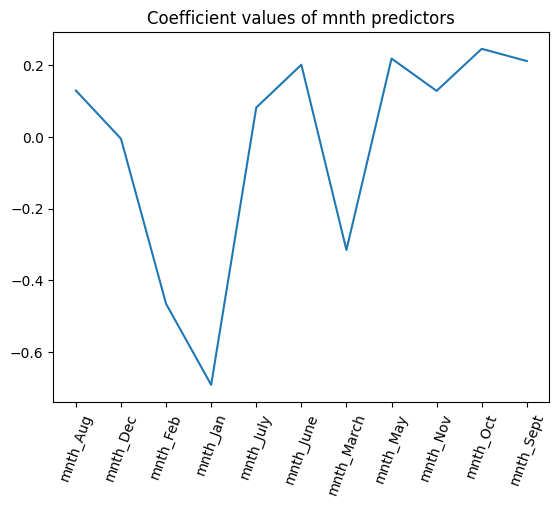

In [75]:
mnth_coef = get_associated_coef('mnth', bikeshr_poisson.params)

plt.plot(mnth_coef.keys(), mnth_coef.values())
plt.xticks(rotation=70)
plt.title('Coefficient values of mnth predictors')

Text(0.5, 1.0, 'Coefficient values of hr predictors')

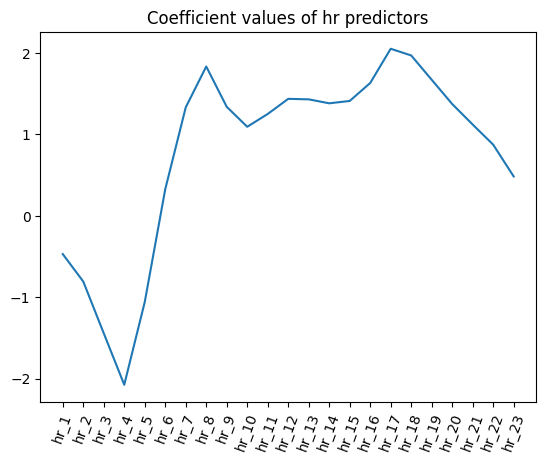

In [76]:
hr_coef = get_associated_coef('hr', bikeshr_poisson.params)
plt.plot(hr_coef.keys(), hr_coef.values())
plt.xticks(rotation=70)
plt.title('Coefficient values of hr predictors')